In [1]:
import numpy as np, scipy as sp
from matplotlib import pyplot as plt
from numpy.random import random # import only one function
from numpy.random import randint

In [22]:
width = 3
state = random(size=(width,width))

In [23]:
state

array([[0.36784293, 0.8215036 , 0.8961738 ],
       [0.39424166, 0.1005727 , 0.33619673],
       [0.20098703, 0.25836293, 0.44754283]])

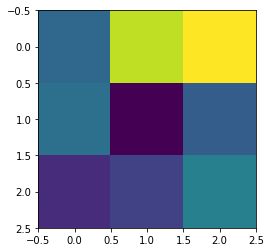

In [24]:
plt.imshow(state)

In [25]:
state[state<=0.5] = -1

In [26]:
state

array([[-1.       ,  0.8215036,  0.8961738],
       [-1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       ]])

In [27]:
state[state>0.5] = 1

In [28]:
state

array([[-1.,  1.,  1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

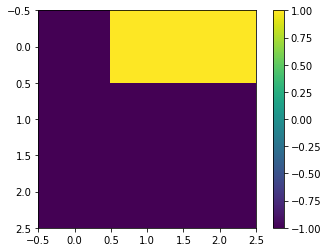

In [29]:
plt.imshow(state)
plt.colorbar()

In [30]:
state

array([[-1.,  1.,  1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

In [31]:
# left ....................right
state[1,1] * state[1,0]  + state[1,1] * state[1,2]

2.0

We want some language to say "add up the product with all of our neighbors"

In [32]:
def energy_internal(state):
    return np.sum(
        state * np.roll(state, 1, axis=0) + # get all of the neighbors in one direction
        state * np.roll(state, 1, axis=1) +
        state * np.roll(state, -1, axis=0) +
        state * np.roll(state, -1, axis=1)
    )
        
    

In [33]:
energy_internal(state)

12.0

At the end of class, I mentioned that the above was going to be slightly wrong for two reasons

* It counts everything twice, so we need a factor of two
* It needs a negative sign

We'll discuss those tomorrow

In [34]:
def energy_internal(state):
    return -np.sum(
        state * np.roll(state, 1, axis=0) + # get all of the neighbors in one direction
        state * np.roll(state, 1, axis=1) +
        state * np.roll(state, -1, axis=0) +
        state * np.roll(state, -1, axis=1)
    )/2


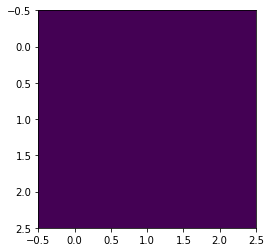

In [40]:
ntrials = 10
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    if energy_internal(new_state) < energy_internal(state):
        state = new_state
    else:
        state = state
plt.imshow(state)

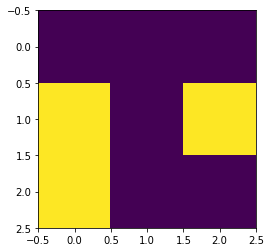

In [47]:
ntrials = 10
T = 10.01
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change <= 0:
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
        else:
            state = state
        state = state
plt.imshow(state)

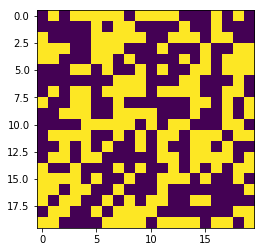

In [50]:
width = 20
state = random(size=(width,width))
state[state<=0.5] = -1
state[state>0.5] = 1
plt.imshow(state)

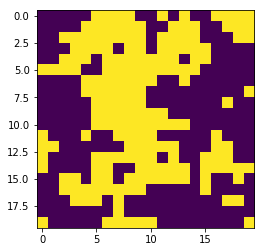

In [59]:
ntrials = 10000
T = 2.72
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change <= 0:
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
        else:
            state = state
        state = state
plt.imshow(state)

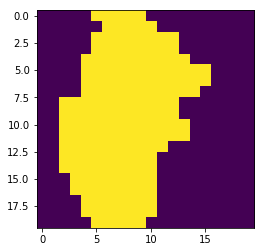

In [60]:
ntrials = 10000
T = 1.2
for ntrial in range(ntrials):
    i,j = randint(width), randint(width)
    new_state = state.copy()
    new_state[i,j] = new_state[i,j]*-1
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change <= 0:
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
        else:
            state = state
        state = state
plt.imshow(state)